In [ ]:
import pandas as pd
from atom import ATOMClassifier
from atom import ATOMLoader
from numpy import sqrt
from numpy import argmax
import numpy as np
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from scipy import interp

In [3]:
X = pd.read_csv("/path/to/csv/", index_col = 0)

X['y'] = [0 if row_name.endswith('H') else 1 for row_name in X.index]

In [4]:
X.head(5)

,CAVNTGNQFYF,CAVNQAGTALIF,CAVNTGGFKTIF,CAVNTGFQKLVF,CAVNTNAGKSTF,CAVNDYKLSF,CAVNSGGYQKVTF,CAVRDGDYKLSF,CAENSGGSNYKLTF,CAVKAAGNKLTF,...,CAGYNNNDMRF,CALSNFGNEKLTF,CALSNQAGTALIF,CAPYNQGGKLIF,CASMDSNYQLIW,CASNAGGTSYGKLTF,CASSFSGANVLTF,CASSLAETQYF,CASSLAGGYNEQFF,y
1_A_B_H,0.000040,0.000081,0.000121,0.000040,0.000081,0.000040,0.000040,0.000403,0.000161,0.000040,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0
1_A_B_OC,0.000081,0.000081,0.000081,0.000040,0.000040,0.000040,0.000081,0.000242,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,1
10_A_B_H,0.000121,0.000081,0.000000,0.000081,0.000040,0.000201,0.000040,0.000040,0.000121,0.000040,...,0.00000,0.000040,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0
10_A_B_OC,0.000000,0.000040,0.000040,0.000040,0.000000,0.000000,0.000121,0.000322,0.000000,0.000161,...,0.00004,0.000081,0.0,0.000081,0.0,0.0,0.00004,0.000040,0.0,1
11_A_B_H,0.000081,0.000081,0.000081,0.000040,0.000000,0.000040,0.000201,0.000121,0.000040,0.000081,...,0.00000,0.000000,0.0,0.000040,0.0,0.0,0.00004,0.000161,0.0,0


In [4]:
X.shape

(83, 601)

SFM from 600 to 10 features


In [50]:
solvers = ["LDA", "XGB", "LR", "LGB"]
models = ["GBM", "LR", "LDA", "QDA", "RNN", "AdaB", "RF", "XGB"] 

atom = ATOMClassifier(X, y="y", test_size=0.25, verbose=2, warnings=False, random_state = 1, index=True)

for solver in solvers:
    atom.branch = "sfm_" + solver + "_from_master"
    atom.feature_selection(strategy="SFM", solver=solver, n_features=10, random_state=0)
        
    models_named = [model + "_" + solver for model in models]
    atom.run(models=models_named, n_calls=50, n_initial_points=10, metric="AUC", n_bootstrap=5)

    atom.save("atom_sfm_600", save_data=False)
        

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (83, 601)
Memory: 404.48 kB
Scaled: False
Outlier values: 813 (2.1%)
-------------------------------------
Train set size: 63
Test set size: 20
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   49 (1.4) |   37 (1.4) |   12 (1.5) |
| 1 |   34 (1.0) |   26 (1.0) |    8 (1.0) |

New branch sfm_LDA successfully created.
Fitting FeatureSelector...
Performing feature selection ...
 --> The LinearDiscriminantAnalysis estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping

In [5]:
atom = ATOMLoader("atom_sfm_600", data = (X,"y")) # atom_sfm_orig_wo12
atom.branch = "master"

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Transforming data for branch sfm_LDA:
Performing feature selection ...
 --> The LinearDiscriminantAnalysis estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVKAAGNKLTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CVVSDRGSTLGRLYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVTGNQFYF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CALNTGGFKTIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVSNDYKLSF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAASNTGNQFYF.
   >>

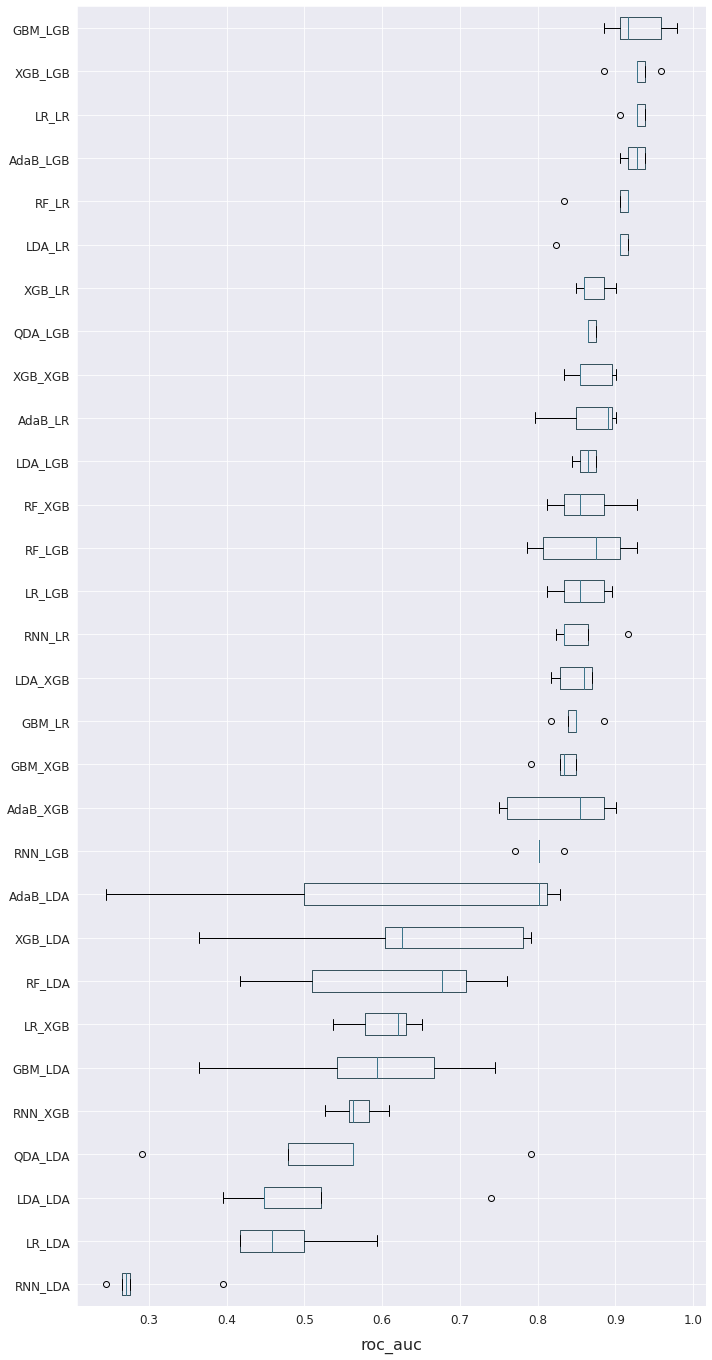

In [52]:
atom.plot_results()

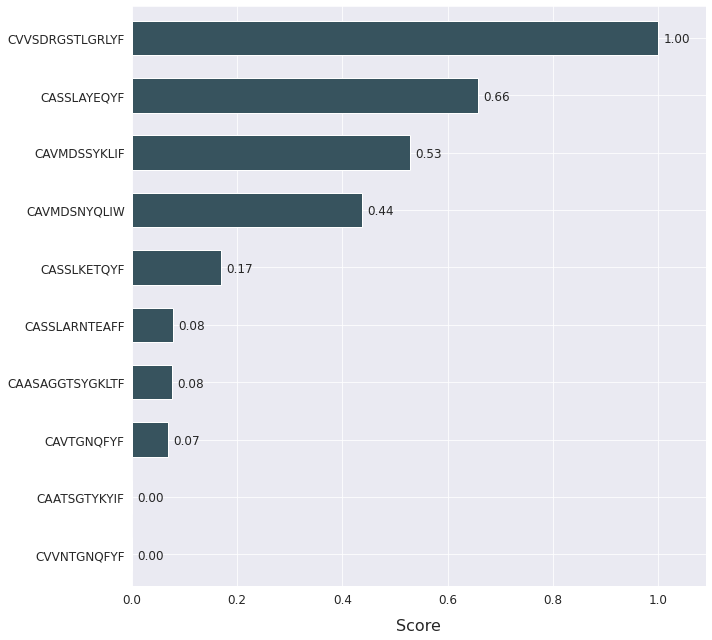

In [53]:
atom.winner.plot_feature_importance()

The above feature importance plot indicates that not all 10 features are impacting the prediction, 

therefore we decided to start the process over while eliminating more features.

In [58]:
solvers = ["GBM", "LDA", "LGB"]
for solver in solvers:
    for i in range(2,8):
        branch_name = "sfmLGB_sfs" + solver + "_" + str(i) + "_from_master"
        atom.branch = branch_name
        atom.feature_selection(strategy="SFM", solver="LGB", n_features=10, random_state=0)
        atom.feature_selection(strategy="SFS", solver=solver, n_features=i, random_state=0, direction = "backward")
        model_name = "GBM_" + solver + "_" + str(i) + "_2step"
        atom.run(models=[model_name], 
                 n_calls=50,
                 n_initial_points=10,
                 metric="AUC",
                 n_bootstrap=5)
        atom.save("atom_sfm_600", save_data=False)
    

New branch sfmLGB_sfsGBM_2 successfully created.
Fitting FeatureSelector...
Performing feature selection ...
 --> The LGBMClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVKAAGNKLTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CALNTGGFKTIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVSNDYKLSF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping 

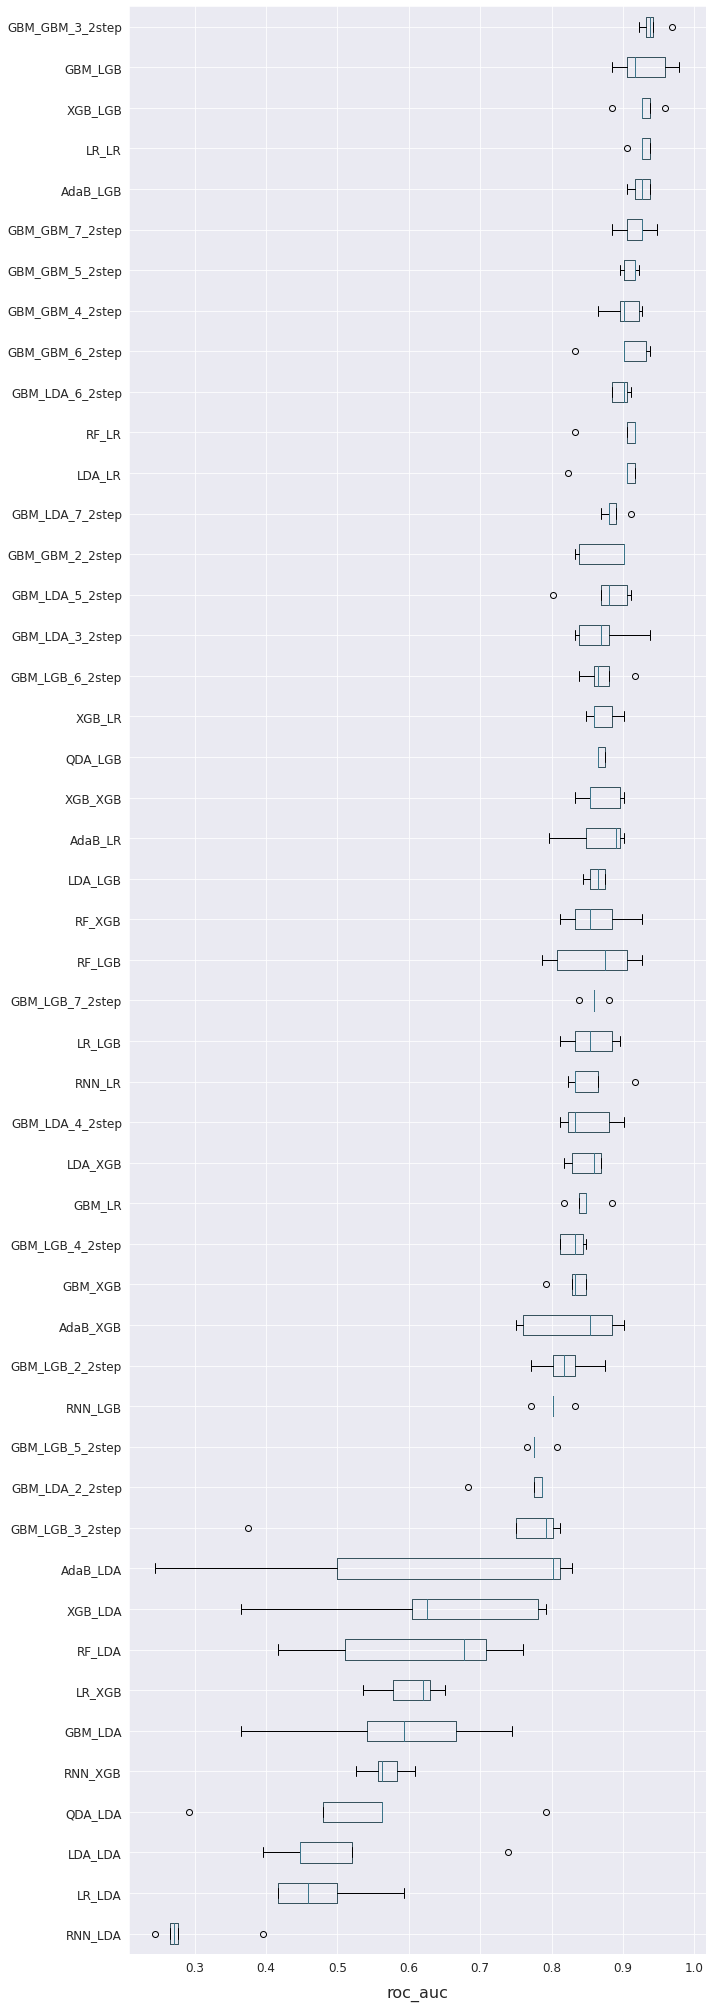

In [6]:
atom.plot_results()

GBM_GBM_3_step is the winning model.

This model was trained with 2 steps of feature selection:

1. SFM with LGB solver (600 features to 10)

2. SFS with GBM solver (10 features to 3)

Model: GBM

In [ ]:
atom.winner

Gradient Boosting Machine
 --> Estimator: GradientBoostingClassifier
 --> Evaluation: roc_auc: 0.9406

In [ ]:
atom.winner.features

['CVVSDRGSTLGRLYF', 'CASSLKETQYF', 'CASSLAYEQYF']

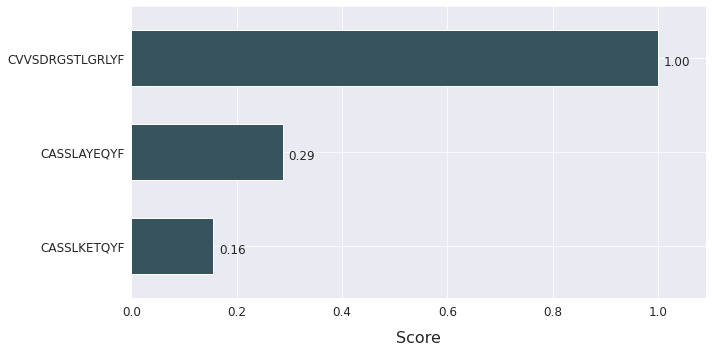

In [17]:
atom.winner.plot_feature_importance()

In [21]:
atom.winner.best_params

{'loss': 'exponential',
 'learning_rate': 0.0333,
 'n_estimators': 165,
 'subsample': 0.8,
 'criterion': 'friedman_mse',
 'min_samples_split': 12,
 'min_samples_leaf': 4,
 'max_depth': 1,
 'max_features': 0.7,
 'ccp_alpha': 0.0246}

atom winner analysis

In [7]:
# keep probabilities for the positive outcome only
#yhat = atom.winner.predict_proba_test[:, 1]
yhat = atom.winner.predict_proba(atom.X)[:,1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(atom.y, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print(f'Best Threshold={best_thresh:.3f}')

roc_auc = auc(fpr, tpr)
print(f'ROC AUC = {roc_auc:.3f}')

Performing feature selection ...
 --> The LGBMClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVKAAGNKLTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CALNTGGFKTIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVSNDYKLSF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAVKTSYDKVIF.
   >>> Dropping feature CAVLNQAGTALIF.
   >>> Dropping

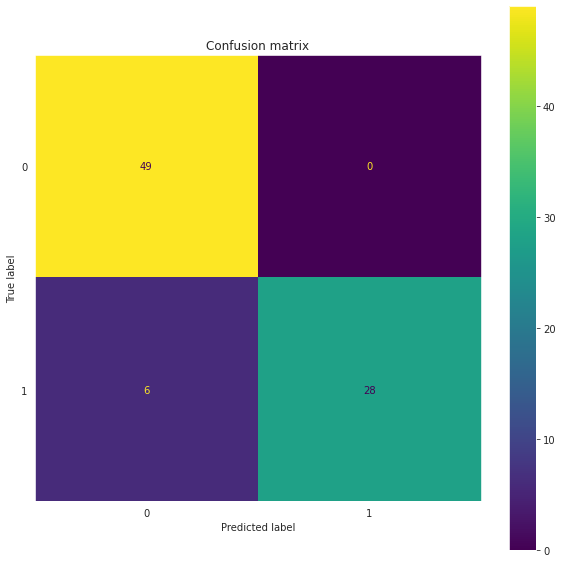

In [8]:
y_pred = (yhat > best_thresh).astype('float')
cm = confusion_matrix(atom.y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.grid(False)
plt.title('Confusion matrix')

#plt.savefig("cm_full_dataset_3f.pdf", transparent= True)
plt.show()

In [38]:
accuracy = accuracy_score(atom.y, y_pred)
F1 = f1_score(atom.y, y_pred)
precision = precision_score(atom.y, y_pred)
recall = recall_score(atom.y, y_pred)
roc_auc = roc_auc_score(atom.y, atom.winner.decision_function(atom.X))

print(f'Accuracy={accuracy:.3f}\nF1={F1:.3f}\nPrecision={precision:.3f}\nrecall={recall:.3f}\nauc={roc_auc:.3f}')


Performing feature selection ...
 --> The LGBMClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVKAAGNKLTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CALNTGGFKTIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVSNDYKLSF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAVKTSYDKVIF.
   >>> Dropping feature CAVLNQAGTALIF.
   >>> Dropping

In [41]:
# evaluation on test set
atom.winner.evaluate(threshold=best_thresh).to_frame().T

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
GBM_GBM_3_2step,0.95,0.941667,0.9375,0.933333,0.875,0.898717,1.0,0.875,0.932292


In [45]:
# which samples were mistakenly tagged as HD
FN_indices = [i for i in range(len(atom.y)) if atom.y.to_numpy()[i] == 1 and y_pred[i] == 0]
FN = [atom.y.index[i] for i in FN_indices]
FN


['6_A_B_OC', '23_A_B_OC', '28_A_B_OC', '45_A_B_OC', '21_A_B_OC', '32_A_B_OC']

ROC AUC for 9 splits of the data with 3 features

In [12]:
atom.branch = "sfmLGB_sfsGBM_3"


Switched to branch sfmLGB_sfsGBM_3.


1
<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (83, 4)
Memory: 2.78 kB
Scaled: False
Outlier values: 3 (1.2%)
Duplicate samples: 22 (26.5%)
-------------------------------------
Train set size: 63
Test set size: 20
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   49 (1.4) |   37 (1.4) |   12 (1.5) |
| 1 |   34 (1.0) |   26 (1.0) |    8 (1.0) |


Training ========================= >>
Models: GBM
Metric: roc_auc


Running BO for Gradient Boosting Machine...
| call             |      loss | learning_rate | n_estimators | subsample |    criterion | min_samples_split | min_samples_leaf | max_depth | max_features | ccp_alpha | roc_auc | best_roc_auc |    time | total_time |
| ---------------- | --------- | ------------- | ------------ | --------- | ------------ | ----------------- | ---------------- | --------- | -----

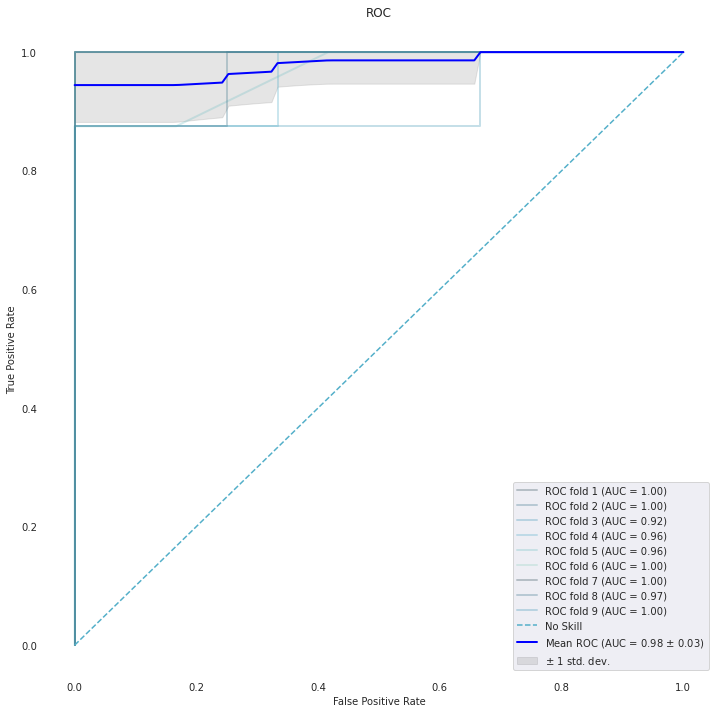

In [15]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111)


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

for x in range(1,10):
    print(x)
    atom_2 = ATOMClassifier(atom.X, y=atom.y, test_size=(20/83), verbose=2, warnings=False, random_state = x)
    atom_2.run(models=["GBM"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

    # keep probabilities for the positive outcome only
    yhat = atom_2.winner.predict_proba_test[:, 1]
    # calculate roc curves
    fpr, tpr, threshold = roc_curve(atom_2.y_test, yhat)
    tprs.append(interp(mean_fpr, fpr, tpr)) 
    auc_score = roc_auc_score(atom_2.y_test, yhat)
    aucs.append(auc_score)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (x, auc_score))


plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, lw=2, alpha=1, color='blue', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

std_tpr = np.std(tprs, axis=0)
tprs_lower = mean_tpr - std_tpr
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=0.2, label=r"$\pm$ 1 std. dev.",)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC')
ax.legend()
ax.set_facecolor('w')
plt.show()
#plt.savefig("roc_3f.pdf", transparent= True)